<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Codigos/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Simples

Este código implementa uma regressão linear simples, calculando os coeficientes $a_0$ e $a_1$ da equação da reta $y = a_0 + a_1x$. Também calcula o coeficiente de determinação R² como uma medida de ajuste do modelo aos dados.

In [ ]:
def linear_regression(x, y):
    # x = vetor n x 1 de pontos de dados independentes
    # y = vetor n x 1 de pontos de dados dependentes
    n = len(x)
    sx = 0
    sy = 0
    sxx = 0
    sxy = 0

    for i in range(n):
        sx = sx + x[i]
        sy = sy + y[i]
        sxx = sxx + x[i] * x[i]
        sxy = sxy + x[i] * y[i]

    a1 = (n * sxy - sx * sy) / (n * sxx - sx * sx)
    a0 = sy / n - a1 * sx / n

    # calcular Sr e St
    Sr = 0
    St = 0
    yavg = sy / n

    for i in range(n):
        St = St + (y[i] - yavg) ** 2
        Sr = Sr + (y[i] - a0 - a1 * x[i]) ** 2

    R2 = (St - Sr) / Sr

    return a0, a1, R2


Abaixo temos uma maneira alternativa de fazer a mesma regressão acima, mas usando produto matricial e um *solver* embutido para o sistema linear.

[2.33352548 0.42850927]


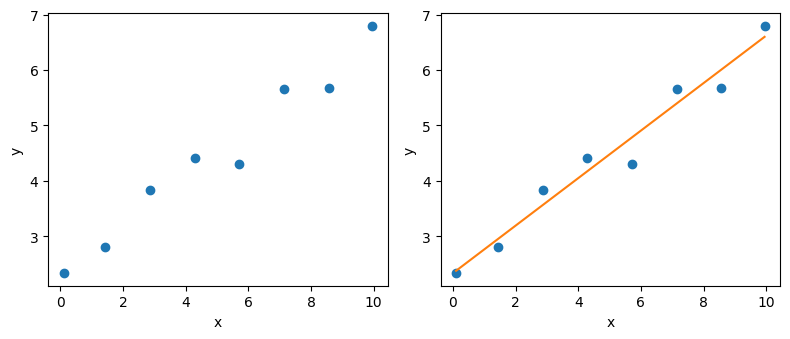

In [ ]:
import numpy
import numpy.linalg as nl
import matplotlib.pyplot as plt

n = 8
x = numpy.array([ 0.1, 1.43, 2.86, 4.29, 5.71, 7.14, 8.57, 9.95 ])
y = numpy.array([2.33, 2.81, 3.84, 4.41, 4.31, 5.65, 5.68, 6.80 ])

if ((n!=x.size) or (n != y.size)):
    print("Erro: número de dados inconsistente!")
    print("Resultados não serão válidos.")

Xsum = numpy.sum(x)
Ysum = numpy.sum(y)
XYsum = numpy.sum(numpy.dot(x,y))
X2sum = numpy.sum(numpy.dot(x,x))

A = numpy.array([[n, Xsum], [Xsum, X2sum]])
f = numpy.array([Ysum, XYsum])

c = nl.solve(A, f)
print(c)

fig=plt.figure(figsize=(8.0,3.5))
plt.subplot(1,2,1)
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
yLR = c[0] + c[1]*x
plt.plot(x,y,'o',x,yLR)
plt.xlabel('x')
plt.ylabel('y')
fig.tight_layout()
plt.savefig('linearRegress.png',dpi=150)

# Regressão Não-Linear


Este código gera dados de temperatura e pressão de vapor fictícios, com ruído aleatório, e então realiza uma regressão não linear usando a função de Antoine para ajustar os coeficientes aos dados. Ele também traça os pontos de dados originais e a curva ajustada em um gráfico. A regressão não-linear utiliza a função `curve_fit` do módulo `scipy.optimize`.

[   6.79843812 1033.78673301  163.69958274]


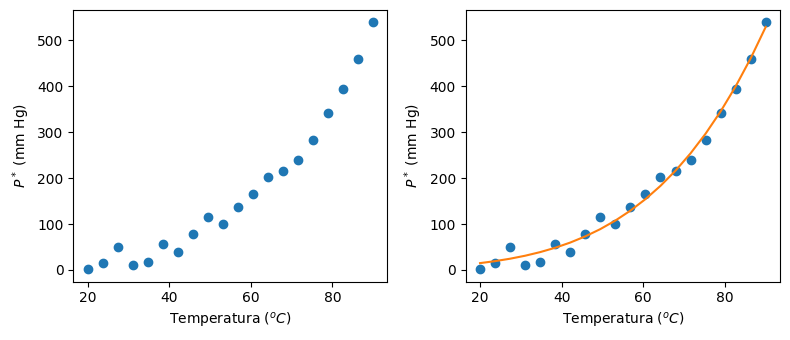

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

n = 20
# Coeficientes de Antoine para água tirados da Wikipedia
A = 8.07131
B = 1730.63
C = 233.426

# Construir alguns dados fictícios de temperatura, x, versus pressão de vapor, y
x = np.linspace(20, 90, num=n)
error = np.random.rand(n)
y = np.zeros(n)
for i in range(n):
    y[i] = A - B / (x[i] + C)
    y[i] = (10 ** y[i]) + 50 * (error[i] - 0.5)

# Função para a equação de Antoine - usada na chamada do curve_fit abaixo.
def antoine(temp, a, b, c):
    n = temp.size
    p = np.zeros(n)
    for i in range(n):
        p[i] = 10 ** (a - b / (temp[i] + c))
    return p

# Chutes para os coeficientes de Antoine e chamada do curve_fit
params = [10, 2000, 200]
popt, pcov = curve_fit(antoine, x, y, p0=params)

print(popt)

fig = plt.figure(figsize=(8.0, 3.5))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.xlabel('Temperatura ($^oC$)')
plt.ylabel('$P^*$ (mm Hg)')

plt.subplot(1, 2, 2)
# calcular a variável dependente para traçar a curva
yfit = antoine(x, popt[0], popt[1], popt[2])
# plotar dados como pontos e ajuste como uma linha
plt.plot(x, y, 'o', x, yfit)
plt.xlabel('Temperatura ($^oC$)')
plt.ylabel('$P^*$ (mm Hg)')
fig.tight_layout()
plt.savefig('nonlinearRegress.png', dpi=150)
